In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 100
size = np.random.randint(500, 4000, num_samples)
bedrooms = np.random.randint(1, 6, num_samples)
prices = (100 * size) + (50000 * bedrooms) + np.random.randint(-50000, 50000, num_samples)

df = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Price': prices})

df.head()


,Size,Bedrooms,Price
0,3674,1,421784
1,1360,5,387005
2,1794,5,425976
3,1630,2,252353
4,1595,5,421503


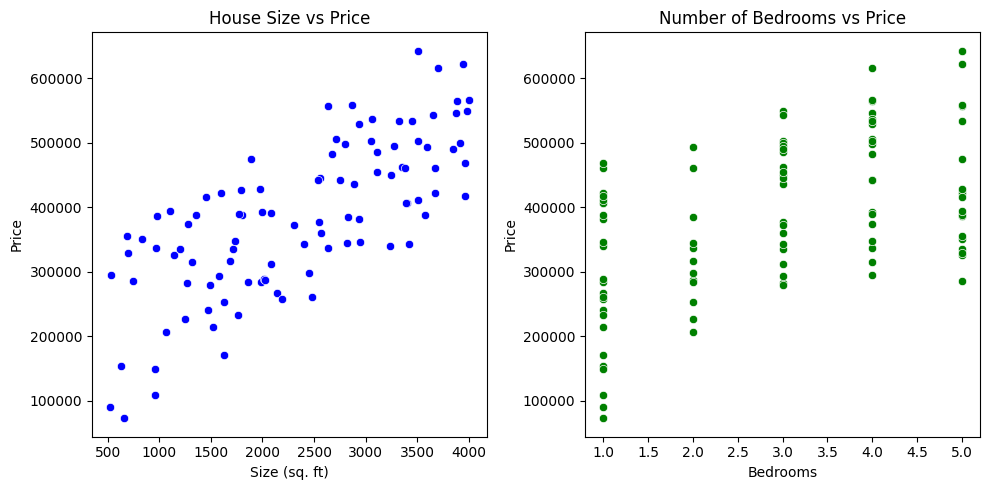

In [187]:
import seaborn as sns

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Size', y='Price', data=df, color='blue')
plt.title('House Size vs Price')
plt.xlabel('Size (sq. ft)')
plt.ylabel('Price')

plt.subplot(1,2,2)
sns.scatterplot(x='Bedrooms', y='Price', data=df, color='green')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Size', 'Bedrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error (MSE): 798717941.78
R-squared: 0.95


In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


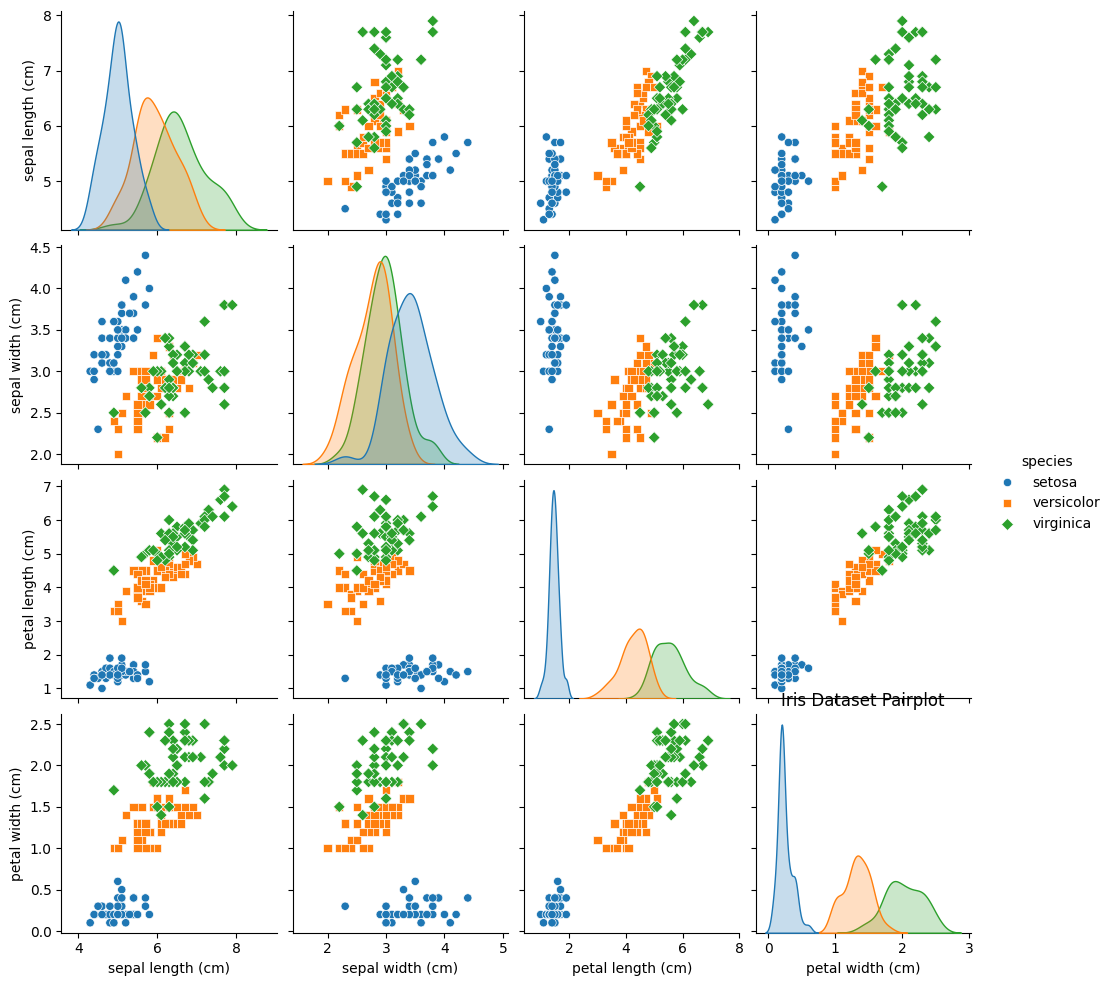

In [190]:

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.title('Iris Dataset Pairplot')
plt.show()


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



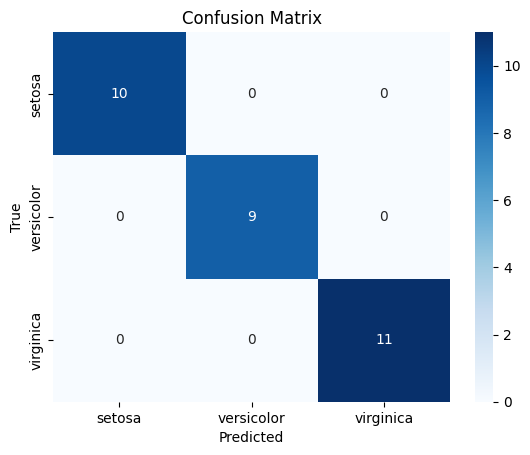

In [191]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [192]:
!pip install pandas numpy seaborn matplotlib scikit-learn nltk


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import movie_reviews
import random

nltk.download('movie_reviews')

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

data = pd.DataFrame(documents, columns=['Review', 'Sentiment'])
data['Review'] = data['Review'].apply(lambda x: ' '.join(x))

print(data.head())


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/bhagya/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                              Review Sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard ' s quick movie review damn ...       neg
2  it is movies like these that make a jaded movi...       neg
3  " quest for camelot " is warner bros . ' first...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


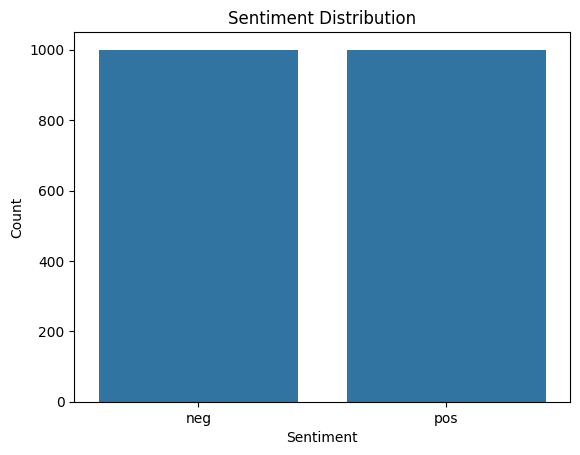

In [194]:

sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
